## Ordinary Least Squares
Ordinary Least Squares(OLS) follows a linear relationship,
$$
\hat{Y} \approx \beta_0+\beta_1X
$$

Residual Sum of Squares(RSS) is used as cost function. It is described as a the distance of the true Y away from the predicted Y. Intuitively, each distance is squared to produce or weigh in more score to points that are farther to true Y.
$$
RSS = \sum_{i=1}^{N}(y_i-\hat{y}_i)^2
$$

#### Estimating the coefficients,
$$
\begin{align}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n(x_i-\overline{x})^2}\\
\hat{\beta}_0 &= \overline{y}-\hat{\beta}_1\overline{x}
\end{align}
$$

For assessing the accuracy of the coefficients, we will need to compute the standard error for each coefficients
$$
SE(\hat{\beta}_0)^2 = \sigma^2\left[\frac{1}{n}+\frac{\overline{x}^2}{\sum_{i=1}^n(x_i-\overline{x})^2}\right],
SE(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i-\overline{x})^2}
$$
where $\sigma^2 = Var(\epsilon)$ or the variance of errors

For the confidence interval(example 95%(approx 2 std) confidence interval),
$$
[\hat{\beta}_1 - 2 \cdot SE(\hat{\beta}_1), \hat{\beta}_1 + 2 \cdot SE(\hat{\beta}_1)],\\
[\hat{\beta}_0 - 2 \cdot SE(\hat{\beta}_0), \hat{\beta}_0 + 2 \cdot SE(\hat{\beta}_0)]
$$

Hypotheis tests can also be performed on the coefficients,
$$H_0: \text{ There is no relationship between X and Y}$$
$$H_\alpha: \text{ There is some relationship between X and Y}$$
This corresponds to testing,
$$H_0: \beta_1 = 0$$
$$H_\alpha: \beta_1 \neq 0$$
We will then compute the t-statistic given by
$$
t = \frac{\hat{\beta}_1-0}{SE(\hat{\beta}_1)}
$$
Then lookup the p-value on the t-distribution table with n-2 degrees of freedom.

<sub>Similar to Z score, where in z score is how many standard deviations is the estimate away from the mean.<br>T-statistic on the other hand, is a measure on how many standard error (error distance) is the coefficient away from zero<br>Zero since we want to know if coeffcient is equal to zero<br>P-value is high the more t-statistic is closer to zero, and if the sample size is small</sub>

#### Assessing accuracy of the model
RSE or Residual Standard Error is the average amount that the response will deviate from the true regression line

$$
RSE = \sqrt{\frac{1}{n-2}RSS}
$$

$R^2$ provides a proportion--proportion of variance explained

$$
R^2 = \frac{TSS-RSS}{TSS} = 1-\frac{RSS}{TSS}
$$

where $TSS = \sum(y_i-\overline{y})^2$ or total sum of squares. $R^2$ tells us the proportion or ratio between the distance from the fitted line, and the distance away from the mean.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
sns.set()
%matplotlib inline

def ols(b0, b1, x):
    y = b0+(b1*x)
    return y

def estimate_coefficients(X, Y):
    n = 0
    d = 0
    y_mean = np.mean(Y)
    x_mean = np.mean(X)
    for i in range(len(X)):
        for x, y in zip(X, Y):
            _ = x - x_mean
            d += _**2
            n+= (_)*(y-y_mean)
    b1 = n/d
    b0 = y_mean-(b1*x_mean)
    return b0, b1

def rss(y, x, b0, b1):
    return np.sum((y-(b0+(b1*x)))**2)

def mse(y, x, b0, b1):
    return rss(y, x, b0, b1)/len(y)

def std_error(x, y):
    d = 0
    for i in x:
        d+=np.power(i - np.mean(x), 2)
    
    b0 = np.sqrt(np.var(y, ddof=1)*((1/np.size(x))+(np.power(np.mean(x), 2)/d)))
    b1 = np.sqrt((np.std(y)**2)/d)
    
    return b0, b1

def rse(y, x, b0, b1):
    return np.sqrt(rss(y, x, b0, b1)/(np.size(y)-2))

def t_test(x, y, b0, b1):
    std0, std1 = std_error(x, y)
    return (b0-0)/std0, (b1-0)/std1

def r2(y, rs):
    tss = 0
    for i in y:
        tss+=(i-np.mean(y))**2
    return 1-(rs/tss)

def ols_result(x, y):
    b0, b1 = estimate_coefficients(x, y)
    e = y - ols(b0, b1, x)
    stde0, stde1 = std_error(x, e)
    t_stat0, t_stat1 = t_test(x, e, b0, b1)
    p_value1, p_value0 = t.sf(t_stat1, df=n-2),t.sf(t_stat0, df=n-2)
    return pd.DataFrame(index=['Intercept', 'B1'],
            data={'Coefficient':[b0, b1],
                  'Std. error':[stde0, stde1],
                  't-statistic':[t_stat0, t_stat1],
                  'p-value':[p_value0, p_value1]
                 }).round(4)

In [5]:
df = pd.read_csv('Advertising.csv')
df = df[df.columns[1:]]
n = df.shape[0]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
b0, b1 = estimate_coefficients(df.TV, df.Sales)
b0, b1

(7.032593549127485, 0.047536640433021186)

In [7]:
rs = rss(df.Sales, df.TV, b0, b1)
rs

2102.5305831313512

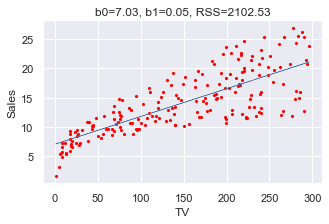

In [8]:
plt.figure(figsize=(5,3))
plt.title('b0={:.2f}, b1={:.2f}, RSS={:.2f}'.format(b0, b1, rs))
sns.scatterplot(data = df,x = 'TV', y='Sales', linewidth=0, s=10, color='red')
plt.plot(df.TV, [ols(b0, b1, i) for i in df.TV], linewidth=0.5)

plt.show()

In [9]:
np.linspace(-6, 6, 30)

array([-6.        , -5.5862069 , -5.17241379, -4.75862069, -4.34482759,
       -3.93103448, -3.51724138, -3.10344828, -2.68965517, -2.27586207,
       -1.86206897, -1.44827586, -1.03448276, -0.62068966, -0.20689655,
        0.20689655,  0.62068966,  1.03448276,  1.44827586,  1.86206897,
        2.27586207,  2.68965517,  3.10344828,  3.51724138,  3.93103448,
        4.34482759,  4.75862069,  5.17241379,  5.5862069 ,  6.        ])

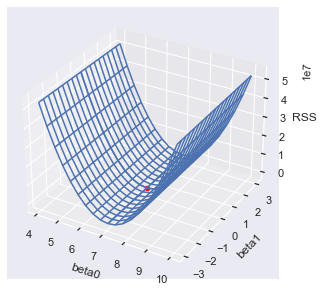

In [10]:
x0 = np.concatenate([np.linspace(b0-3,b0, 10),np.linspace(b0,b0+3, 10)])
x1 = np.concatenate([np.linspace(b1-3,b1, 10),np.linspace(b1,b1+3, 10)])

X, Y = np.meshgrid(x0, x1)
Z = []

for i in x0:
    _ = []
    for j in x1:
        _.append(rss(df.Sales, df.TV, i, j))
    Z.append(_)
Z = np.array(Z)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.scatter(b0, b1, rss(df.Sales, df.TV, b0, b1), color='red')
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')
ax.set_zlabel('RSS')
ax.view_init(30, -60)

In [11]:
rse(df.Sales, df.TV, b0, b1)

3.2586563686504624

In [12]:
# 95% Confidence  interval for b1
# where in sigma is the standard deviation of residuals

e = df.Sales - ols(b0, b1, df.TV)
stde0, stde1 = std_error(df.TV, e)
[b1-(2*stde1), 
 b1+(2*stde1)]

[0.042182399732927874, 0.0528908811331145]

In [13]:
stde0, stde1

(0.4566911323097187, 0.0026771203500466573)

In [14]:
[b0-(2*stde0), 
 b0+(2*stde0)]

[6.119211284508047, 7.945975813746923]

In [19]:
t_stat1, t_stat0 = t_test(df.TV, e, b0, b1)
t_stat1, t_stat0

(15.399014895603715, 17.756631834722228)

In [20]:
p_value1, p_value0 = t.sf(t_stat1, df=n-2),t.sf(t_stat0, df=n-2)
f'pb1 = {p_value1:.5f}, pb0 = {p_value0:.5f}'

'pb1 = 0.00000, pb0 = 0.00000'

In [21]:
ols_result(df.TV, df.Sales)

,Coefficient,Std. error,t-statistic,p-value
Intercept,7.0326,0.4567,15.3990,0.0
B1,0.0475,0.0027,17.7566,0.0


In [22]:
rse(df.Sales, df.TV, b0, b1)

3.2586563686504624

In [23]:
r2(df.Sales, rs)

0.6118750508500709

In [24]:
ols_result(df.Radio, df.Sales)

,Coefficient,Std. error,t-statistic,p-value
Intercept,9.3116,0.5615,16.5840,0.0
B1,0.2025,0.0203,9.9707,0.0


In [25]:
ols_result(df.Newspaper, df.Sales)

,Coefficient,Std. error,t-statistic,p-value
Intercept,12.3514,0.6199,19.9262,0.0000
B1,0.0547,0.0165,3.3162,0.0005


## Multiple Linear Regression
$$
\hat{Y} \approx \beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon
$$

Let 
$$
y = \begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix},\hspace{1em}
X = \begin{bmatrix}
1 &x_{11} &x_{12} &\cdots &x_{1k}\\
1 &x_{11} &x_{12} &\cdots &x_{1k}\\
\vdots &\vdots &\vdots & &\vdots\\
1 &x_{n1} &x_{n2} &\cdots &x_{nk}
\end{bmatrix}\\
\beta = \begin{bmatrix}\beta_0\\\beta_1\\\vdots\\\beta_k\end{bmatrix},\hspace{1em}
\epsilon = \begin{bmatrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\end{bmatrix}
$$

With this compact notation, linear regression model can be written in the form
$$y = X\beta+\epsilon$$

<sub>Remember that an m x n matrix multiplied by n x p matrix = m x p matrix<br>For example, $X\beta = (n \times k)(k\times1) = n \times 1$</sub>

In linear algeba terms, the least-squares parameter estimates $\beta$ are the vectors that minimize
$$
\sum_{i=1}^{n} = \epsilon_i^2 = \epsilon^T\epsilon = (y-X\beta)^T(y-X\beta)
$$

If all $\epsilon_i$ were zero, then
$$\hat{y} = X\hat{\beta}$$

Then the residuals $y-\hat{y}$ are orthogonal to the columns of X(**Orthogonal Decomposition**) thus,
$$
X^T(y-X\hat{\beta}) = 0\\
X^Ty-X^TX\hat{\beta} = 0\\
X^TX\hat{\beta} = X^Ty\\
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

In [29]:
df.Sales.shape

(200,)

In [38]:
df['Coeff'] = 1
df[['Coeff', 'TV', 'Radio', 'Newspaper']].values.shape

(200, 4)

In [41]:
X = df[['Coeff', 'TV', 'Radio', 'Newspaper']].values
y = df.Sales
beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))

In [42]:
def std_error(X, y):
    d = 0
    for i in x:
        d+=np.power(i - np.mean(x), 2)
    
    b0 = np.sqrt(np.var(y, ddof=1)*((1/np.size(x))+(np.power(np.mean(x), 2)/d)))
    b1 = np.sqrt((np.std(y)**2)/d)
    
    return b0, b1
for i in x:
    d+=np.power(i - np.mean(x), 2)
stde = std_error()

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])